In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample datasets
np.random.seed(42)

# Dataset for Linear Regression
X_linear = 2 * np.random.rand(100, 1)
y_linear = 4 + 3 * X_linear + np.random.randn(100, 1)

# Dataset for Logistic Regression
X_logistic = np.random.randn(200, 2)
y_logistic = (X_logistic[:, 0] + X_logistic[:, 1] > 0).astype(int).reshape(-1, 1)

# Dataset for K-Means
X_kmeans = np.random.randn(300, 2)
X_kmeans[:100] += [3, 3]
X_kmeans[100:200] += [-3, -3]
X_kmeans[200:] += [3, -3]

print("Datasets created!")
print(f"Linear: X={X_linear.shape}, y={y_linear.shape}")
print(f"Logistic: X={X_logistic.shape}, y={y_logistic.shape}")
print(f"K-Means: X={X_kmeans.shape}")

Datasets created!
Linear: X=(100, 1), y=(100, 1)
Logistic: X=(200, 2), y=(200, 1)
K-Means: X=(300, 2)


In [11]:
class StandardScalerManual:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean) / (self.std + 1e-8)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [12]:
class LinearRegressionManual:

    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.theta = None
        self.losses = []

    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
        self.theta = np.random.randn(n + 1, 1) * 0.01

        for epoch in range(self.epochs):
            y_pred = X_b @ self.theta

            mse = np.mean((y_pred - y) ** 2)
            reg = (self.l2_lambda / (2*m)) * np.sum(self.theta[1:] ** 2)
            self.losses.append(mse + reg)

            gradients = (1/m) * X_b.T @ (y_pred - y)
            gradients[1:] += (self.l2_lambda / m) * self.theta[1:]

            self.theta -= self.lr * gradients

        return self

    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        return X_b @ self.theta

Final theta: [6.8200041  1.63825907]
Final loss: 0.8079


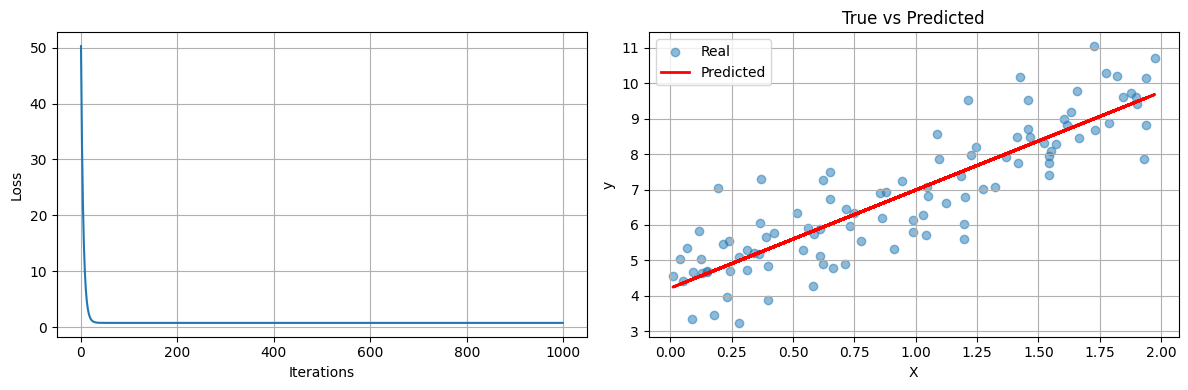

In [13]:
scaler = StandardScalerManual()
X_linear_scaled = scaler.fit_transform(X_linear)

model_lr = LinearRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model_lr.fit(X_linear_scaled, y_linear)
y_pred = model_lr.predict(X_linear_scaled)

print(f"Final theta: {model_lr.theta.ravel()}")
print(f"Final loss: {model_lr.losses[-1]:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(model_lr.losses)
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

axes[1].scatter(X_linear, y_linear, alpha=0.5, label='Real')
axes[1].plot(X_linear, y_pred, 'r-', linewidth=2, label='Predicted')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')
axes[1].set_title('True vs Predicted')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [14]:
def sigmoid(z):
    """Sigmoid: σ(z) = 1 / (1 + e^(-z))"""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

In [15]:
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.theta = None
        self.losses = []

    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]
        self.theta = np.random.randn(n + 1, 1) * 0.01

        for epoch in range(self.epochs):
            z = X_b @ self.theta
            y_pred = sigmoid(z)

            epsilon = 1e-8
            bce = -np.mean(y * np.log(y_pred + epsilon) +
                          (1 - y) * np.log(1 - y_pred + epsilon))
            reg = (self.l2_lambda / (2*m)) * np.sum(self.theta[1:] ** 2)
            self.losses.append(bce + reg)

            gradients = (1/m) * X_b.T @ (y_pred - y)
            gradients[1:] += (self.l2_lambda / m) * self.theta[1:]

            self.theta -= self.lr * gradients

        return self

    def predict_proba(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        return sigmoid(X_b @ self.theta)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

Final theta: [-0.1067915   4.07631076  3.46662915]
Final loss: 0.1178
Training Accuracy: 100.00%


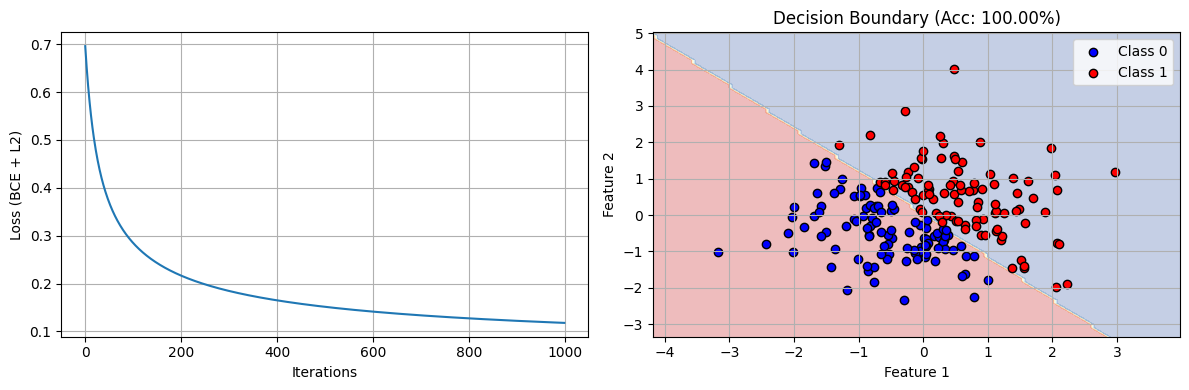

In [16]:
scaler2 = StandardScalerManual()
X_logistic_scaled = scaler2.fit_transform(X_logistic)

model_log = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model_log.fit(X_logistic_scaled, y_logistic)
y_pred_log = model_log.predict(X_logistic_scaled)

accuracy = np.mean(y_pred_log == y_logistic) * 100

print(f"Final theta: {model_log.theta.ravel()}")
print(f"Final loss: {model_log.losses[-1]:.4f}")
print(f"Training Accuracy: {accuracy:.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(model_log.losses)
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Loss (BCE + L2)')
axes[0].grid(True)

x_min, x_max = X_logistic_scaled[:, 0].min()-1, X_logistic_scaled[:, 0].max()+1
y_min, y_max = X_logistic_scaled[:, 1].min()-1, X_logistic_scaled[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = model_log.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
axes[1].scatter(X_logistic_scaled[y_logistic.ravel()==0, 0],
                X_logistic_scaled[y_logistic.ravel()==0, 1],
                c='blue', label='Class 0', edgecolors='k')
axes[1].scatter(X_logistic_scaled[y_logistic.ravel()==1, 0],
                X_logistic_scaled[y_logistic.ravel()==1, 1],
                c='red', label='Class 1', edgecolors='k')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title(f'Decision Boundary (Acc: {accuracy:.2f}%)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [17]:
def kmeans_matrix(M, k, max_iters=100):
    n, m = M.shape
    elements = M.flatten()
    num_elements = len(elements)

    np.random.seed(42)
    indices = np.random.choice(num_elements, k, replace=False)
    centroids = elements[indices].copy()

    assignments = np.zeros(num_elements, dtype=int)

    for iteration in range(max_iters):
        old_assignments = assignments.copy()

        for i in range(num_elements):
            distances = np.abs(elements[i] - centroids)
            assignments[i] = np.argmin(distances)

        for cluster_id in range(k):
            cluster_elements = elements[assignments == cluster_id]
            if len(cluster_elements) > 0:
                centroids[cluster_id] = np.mean(cluster_elements)

        if np.array_equal(assignments, old_assignments):
            print(f"Converged at iteration {iteration}")
            break

    assignment_table = assignments.reshape(n, m)

    cookbook = {}
    for cluster_id in range(k):
        positions = []
        for i in range(n):
            for j in range(m):
                if assignment_table[i, j] == cluster_id:
                    positions.append((i, j))
        cookbook[cluster_id] = positions

    return assignment_table, cookbook, centroids

Matrix shape: (10, 10)

Original matrix (first 5x5):
[[63.92002286 59.18316606 34.29499396 40.10371863 59.40771188]
 [36.65974505 43.98632356 53.19781934 34.07006266 54.40474738]
 [45.70594459 51.22297503 55.43298029 50.4886007  50.40591691]
 [43.07094802 42.81592734 58.94924377 47.05050322 62.47742073]
 [53.0982071  56.33776881 54.13799097 48.14712341 48.701793  ]]
Converged at iteration 2

Clusters: 3
Centroids: [51.47363023 39.93733353 64.73597591]

Assignments (first 5x5):
[[2 2 1 1 2]
 [1 1 0 1 0]
 [0 0 0 0 0]
 [1 1 2 0 2]
 [0 0 0 0 0]]

Cookbook:
  Cluster 0: 45 elements, centroid=51.47
  Cluster 1: 34 elements, centroid=39.94
  Cluster 2: 21 elements, centroid=64.74


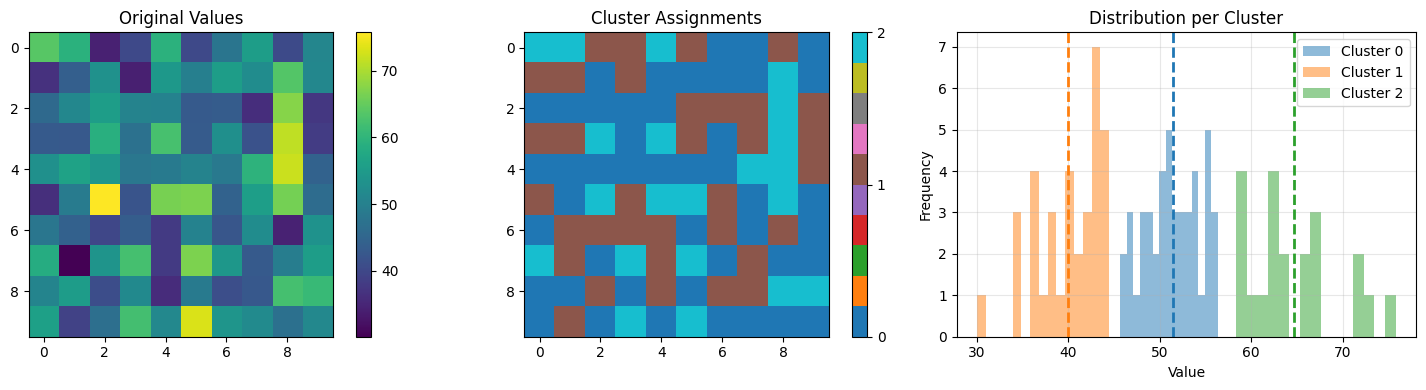

In [18]:
test_matrix = np.random.randn(10, 10) * 10 + 50

print(f"Matrix shape: {test_matrix.shape}")
print(f"\nOriginal matrix (first 5x5):")
print(test_matrix[:5, :5])

k = 3
assignment_table, cookbook, centroids = kmeans_matrix(test_matrix, k)

print(f"\nClusters: {k}")
print(f"Centroids: {centroids}")
print(f"\nAssignments (first 5x5):")
print(assignment_table[:5, :5])

print(f"\nCookbook:")
for cid, positions in cookbook.items():
    print(f"  Cluster {cid}: {len(positions)} elements, centroid={centroids[cid]:.2f}")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

im1 = axes[0].imshow(test_matrix, cmap='viridis')
axes[0].set_title('Original Values')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(assignment_table, cmap='tab10')
axes[1].set_title('Cluster Assignments')
plt.colorbar(im2, ax=axes[1], ticks=range(k))

for cid in range(k):
    values = [test_matrix[i, j] for i, j in cookbook[cid]]
    axes[2].hist(values, alpha=0.5, label=f'Cluster {cid}', bins=15)
    axes[2].axvline(centroids[cid], color=f'C{cid}', linestyle='--', linewidth=2)

axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution per Cluster')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()